In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

In [46]:
def GenerateRandomUniform(N: int):
    array = np.random.uniform(0, 1, N)
    array.sort()
    return array

def ModulateKsi(N: int, theta: float):
    eta = GenerateRandomUniform(N)
    return (1 - eta) ** (1 / (1 - theta))

In [47]:
N = 100
theta = 5
generated = ModulateKsi(N, teta)

In [48]:
def ThetaWave(sample):
    return  len(sample) / sum(np.log(sample)) + 1

In [108]:
def ConfidenceIntervalAsymptoticMedian(sample):
    theta_wave = ThetaWave(sample)
    power = 1 / (theta_wave - 1)
    powered_2 = 2 ** power
    n = len(x)
    same_part = 1.96 * np.log(2) * powered_2 / np.sqrt(n) / (theta_wave - 1)
    n = len(sample)
    left = - same_part + powered_2
    right = same_part + powered_2
    return left, right

In [109]:
ConfidenceIntervalAsymptoticMedian(generated)

(1.1289325223252344, 1.1979800327231716)

In [110]:
def ConfidenceIntervalAsymptoticTheta(sample):
    theta_wave = ThetaWave(sample)
    n = len(sample)
    left = -1.96 * (theta_wave - 1) / n ** 0.5 + theta_wave
    right = 1.96 * (theta_wave - 1) / n ** 0.5 + theta_wave
    return left, right

In [111]:
ConfidenceIntervalAsymptoticTheta(generated)

(4.681032229186912, 6.475764360830282)

In [112]:
def BootstrapGenerate(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

In [113]:
def BootstrapNotParametricTheta(sample):
    bootstrap_generated = BootstrapGenerate(sample)
    theta_wave = ThetaWave(sample)
    delts = []
    for current_sample in bootstrap_generated:
        theta_star = ThetaWave(current_sample)
        delts.append(theta_star - theta_wave)
    delts = np.sort(delts)
    return (-delts[974] + theta_wave , -delts[24] + theta_wave)

In [114]:
BootstrapNotParametricTheta(generated)

(4.6916765707776165, 6.2082397883541205)

In [115]:
def BootstrapNotParametricMedian(sample):
    botstrap_generated = BootstrapGenerate(sample)
    theta_ = ThetaWave(sample)
    median_star = 2 ** (1 / (theta_ -1 ))
    delts = []
    for current_sample in botstrap_generated:
        delts.append(np.median(current_sample) - median_star)
    delts = np.sort(delts)
    return (max(-delts[974] + median_star, 0) , -delts[24] + median_star)

In [116]:
BootstrapNotParametricMedian(generated)

(1.0562286286671936, 1.1806814131504006)

In [117]:
def ParetoGenerate(sample, N):
    theta_wave = ThetaWave(sample)
    n = len(sample)
    return [ModulateKsi(n, theta_wave) for _ in range(N)]

In [118]:
def BootstrapParametricTheta(sample):
    N = 50000
    generated_with_model = ParetoGenerate(sample, N)
    param = []
    
    for current_sample in generated_with_model:
        param.append(ThetaWave(current_sample))
    param = np.sort(param)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1
    return param[k1], param[k2]

In [119]:
BootstrapParametricTheta(generated)

(4.800324027766418, 6.625861246478965)

In [120]:
def EstimationMedian(x):
    return np.power(2, 1 / (ThetaWave(x) - 1))

def BootstrapParametricMedian(x):
    N = 50000
    generated_with_model = ParetoGenerate(x, N)
    medians = []
    for current_sample in generated_with_model:
        medians.append(EstimationMedian(current_sample))
    medians = np.sort(medians)
    k1 = int((1 - 0.95) * N / 2)
    k2 = int((1 + 0.95) * N / 2)
    return medians[k1], medians[k2]

In [121]:
BootstrapParametricMedian(generated)

(1.1314090679741633, 1.2002824266486996)

In [122]:
def Compare(sample, func_list, names_list):
    h = 0
    for f in func_list:
        left, right = f(sample)
        x = np.linspace(left, right, len(sample))
        y = [h] * len(x)
        plt.plot(x, y)
        h -= 0.1 
    plt.legend(names_list, loc='upper right', framealpha=0.1, fontsize='x-small')
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)

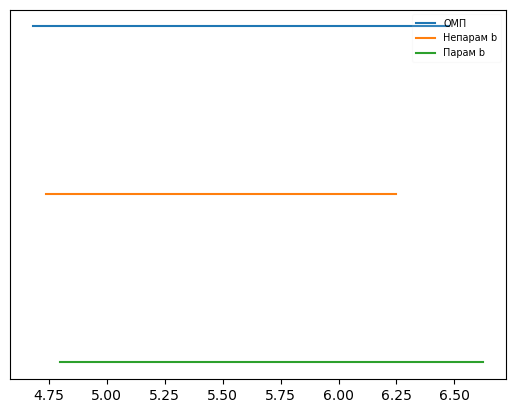

In [123]:
func_list_theta = [ConfidenceIntervalAsymptoticTheta, BootstrapNotParametricTheta,  BootstrapParametricTheta ]
names_list_theta = ['ОМП', 'Непарам b', 'Парам b']
Compare(generated, func_list_theta, names_list_theta)

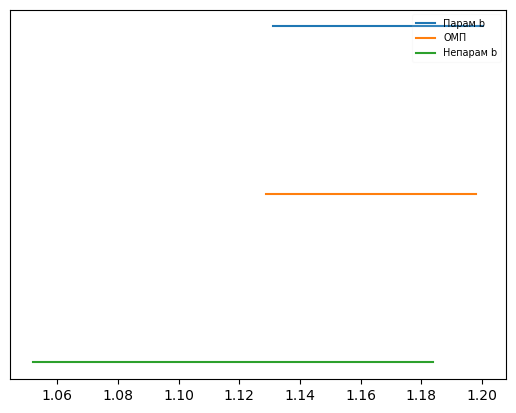

In [124]:
func_list_median = [ BootstrapParametricMedian, ConfidenceIntervalAsymptoticMedian, BootstrapNotParametricMedian]
names_list_median = ['Парам b', 'ОМП', 'Непарам b']
Compare(generated, func_list_median, names_list_median)